In [1]:
# Goal is to predict the class of the flower from one of three possible classes.  
# We will be building models to predict class based on features  
# Then we will use those models to predict the classes of a hold-out set to see how well they perform

# This is a multi-class classification problem

# We will be using the following types of models:
#    * Multinomial Logistic regression
#    * Linear discriminant analysis
#    * K Nearest Neighbors
#    * CART
#    * Gaussian Naive Bayes
#    * Support Vector Machines


In [20]:
# Import libraries for manipulating and visualizing data
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas.plotting import parallel_coordinates

#libraries for preparing datasets for modeling 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import model_selection

#libraries to build machine learning models 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# libraries for assessing model performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# libraries I didn't need here but am keeping for later reference
#from datetime import datetime
#from datetime import date
#from collections import Counter

#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import Normalizer
#from sklearn import svm
#import xgboost as xgb
#from xgboost import XGBClassifier
#import lightgbm as lgbm
#from sklearn.metrics import log_loss
#from pandas.plotting import scatter_matrix

In [21]:
# import data
iris = datasets.load_iris()

In [22]:
type(iris)

sklearn.utils.Bunch

In [23]:
iris

# The features are written into 4 columns in one array, and the target is written into a separate array
# There's also an array for target names plus a bunch of metadata in here that I hadn't realized is in this dataset.

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [24]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [25]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
iris.target_names

# I don't really need these because I would be converting them back into 0,1,and 2 anyway, but it's good to know 
# they're in here too if I need to refer to them

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [28]:
iris.DESCR

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

In [29]:
# Convert to a pandas dataframe so it's easier to work with this data

In [30]:
# np.c concatenates (connects) the two arrays into the same dataframe 

df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], 
                  columns = iris['feature_names'] + ['target'])


In [31]:
df.shape

# 150 rows, 5 columns

(150, 5)

In [32]:
df[1:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [33]:
# How many unique targets are there?  There should be 3 different classes of flowers
df['target'].unique()

array([0., 1., 2.])

In [34]:
# How many of each type?  50 of each.  Good to know
df.groupby('target').size()

target
0.0    50
1.0    50
2.0    50
dtype: int64

In [35]:
# Looks like they are all together as well, which means when we create a training and validation set, we'll want to
# randomly select it, not just remove the last 50 rows (since they will all be '2')

df[140:150]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
140,6.7,3.1,5.6,2.4,2.0
141,6.9,3.1,5.1,2.3,2.0
142,5.8,2.7,5.1,1.9,2.0
143,6.8,3.2,5.9,2.3,2.0
144,6.7,3.3,5.7,2.5,2.0
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


In [36]:
# Do we have any missing data?  No.  

df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [37]:
#################################
####### DATA EXPLORATION  #######
#################################

/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/miniconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


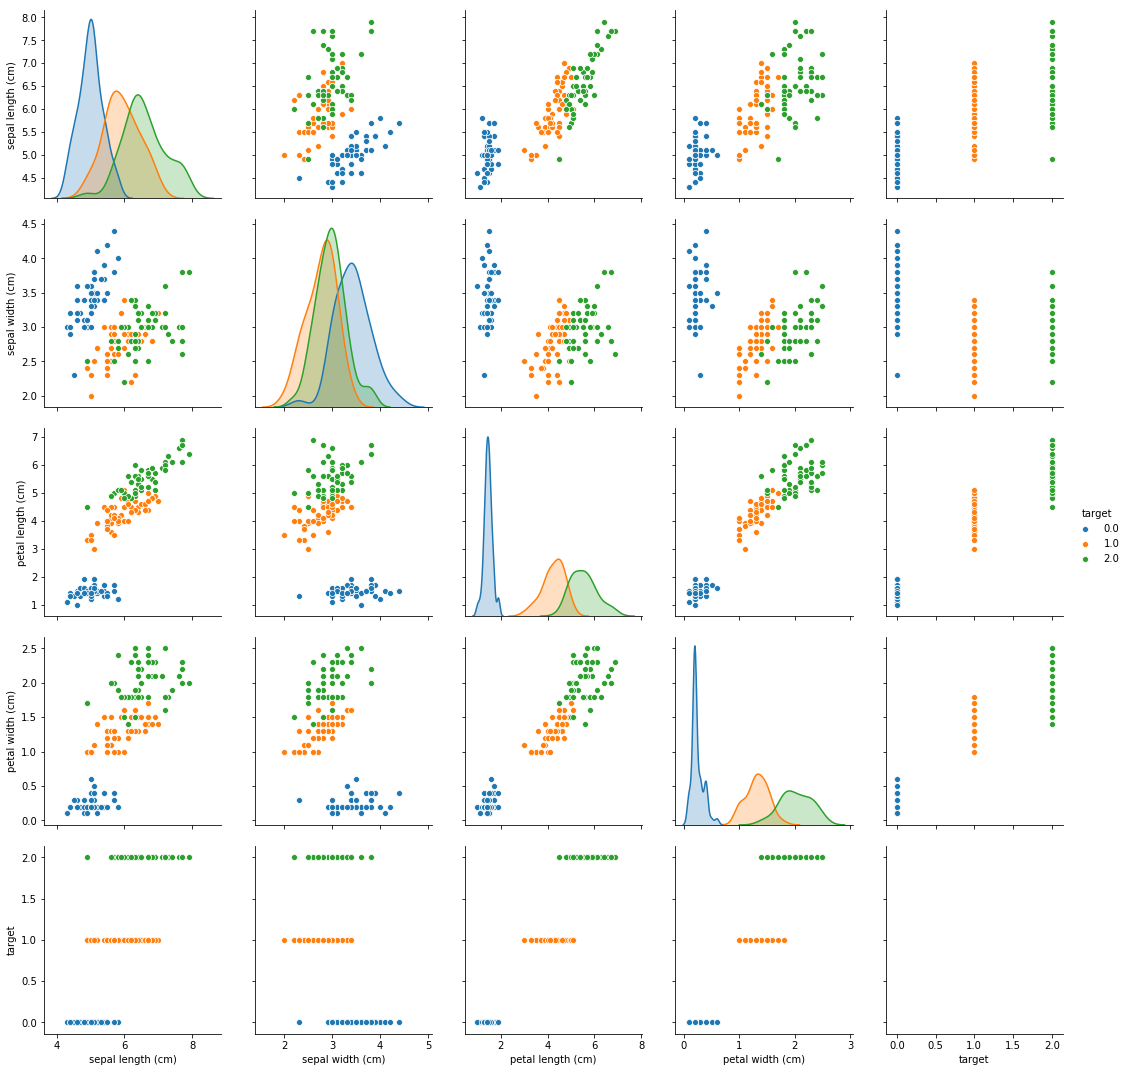

In [38]:
#Plot relationship between pairwise.  Note that I needed to go back to the combined data with x and y together
# and the validation data included.

sns.pairplot(df, hue="target", height=3)
plt.show()

# Wow - this is amazing analysis. Blue (0) tends to have lower sepal lengths, and petal lengths/widths.  Sepal widths 
# tend to be greater.
# The distinction between orange (1) and green (2) is a bit less obvious.  Petal length/wdith tend to be smaller
# for orange than for green.  Sepal width doesn't seem to help much.
# Based on this, it seems like it would be fairly straightforward to classify these as well.

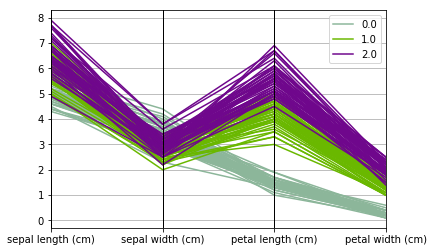

In [39]:
# Here's a different view.  Clearly, petal length will separate class 0 from the others.  The others are a bit 
# trickier, but petal length may be useful for separating 1 from 2 as well other than the ones on the border.
# Same conclusion as above - just different grahs

plt.figure()
parallel_coordinates(df, "target")

In [40]:
df.corr()

# petal length and width are pretty much the same thing.  They are almost the same as sepal length.
# Sepal width is fairly uncorrelated with the other factors.  
# The correlation to the target doesn't really mean anything since those values are categorical

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [41]:
####################################################
####### CREATE TRAINING AND VALIDATION SETS  #######
####################################################

# Let's create training and validation sets now before we explore.  We are artificially creating a set for use
# in data science.  This dataset is actually complete, and we could simply analyze it and try to understand the 
# differences.  Instead, we're going to try to predict the class based on a subset of the data

In [42]:
# Split out features and target.  Note a very interesting aspect of this... 0:4 specifies columns 0-3, but you have 
# to use the 4 so it goes up to 4 without including it.  It's easy to get this wrong.

X = df[df.columns[0:4]]
Y = df[df.columns[4]]

In [43]:
validation_size = 0.20
seed = 1

In [44]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)



In [45]:
# If we remove 20% of the values, that's 30 values.  So training should be 150-30 =120 rows
X_train.shape

(120, 4)

In [46]:
X_train[0:5]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
91,6.1,3.0,4.6,1.4
135,7.7,3.0,6.1,2.3
69,5.6,2.5,3.9,1.1
128,6.4,2.8,5.6,2.1
114,5.8,2.8,5.1,2.4


In [47]:
Y_train.shape

(120,)

In [48]:
Y_train[0:5]

91     1.0
135    2.0
69     1.0
128    2.0
114    2.0
Name: target, dtype: float64

In [49]:
X_validation.shape

(30, 4)

In [50]:
Y_validation.shape

(30,)

In [51]:
####################################################
#######    BUILD MACHINE LEARNING MODELS     #######
####################################################

In [52]:
# We are going to split the X_train data into 10 splits.  9 will be used for the training and 1 will be used to validate
# The process will run 10 times and then average the scores across all of the runs

In [53]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)



In [54]:
#######################################################################################################################
##### 1.  LOGISTIC REGRESSION (specifically a multinomial logistic regression aka multiclass logistic regression) #####
#######################################################################################################################

# Logistic regression is normally used for binary classification.
# It assumes a Gaussian distribution (bell-curve) for the input variables.
# It assumes input variables are not correlated; if there are highly correlated inputs, consider removing them or 
# the model is likely to overfit

# It uses a logistic function (S-curve, sigmoid function) that is restricted between 0 and 1.
# It uses a standardized formula with a parameter for each feature.  
# You can and should assess whether these features are significant or not by looking at their P-values
 
# It tries to fit a set of parameters to each feature that maximizes the likelihood of getting the observed data
# This is called Maximum Liklihood Estimation (MLE)
# The process of fitting the set of parameters is an iterative optimization using gradient descent.   
# 
# There are a few different steps in terms of how this is calculated... provide the detail later.
# For more than two classes, multinomial logistic regression can be done, but linear discriminant analysis (LDA) 
# typically provides better results

# In a multinomial regression with 3 targets, 3 logistic regression models are run.  0 and 1, 1 and 2, and 0 and 2.
# The highest probability classification out of the three models is selected as the prediction.


In [55]:
# Run the logistic regression model using cross validation with 10 folds
cv_results_LR = model_selection.cross_val_score(LogisticRegression(solver='liblinear', multi_class='ovr'), X_train, Y_train, cv=kfold, scoring='accuracy')

In [56]:
# Identify the accuracy (this is the mean of all 10 runs of the model)
cv_results_LR.mean()

0.9333333333333332

In [57]:
cv_results_LR.std()

0.05

In [58]:
######################################################
####### 2. LINEAR DISCRIMINANT ANALYSIS (LDA)  #######
######################################################

# Generally better than logistic regression when doing a classification task across multiple classes.
# It assumes a Gaussian distribution (bell-curve) for the input variables.
# Examines the mean and variance of each class and between classes
# Then predicts values to both minimize the in-class variance and maximize the out-of-class variance


In [59]:
cv_results_LDA = model_selection.cross_val_score(LinearDiscriminantAnalysis(), X_train, Y_train, cv=kfold, scoring='accuracy')

In [60]:
cv_results_LDA.mean()

0.9749999999999999

In [61]:
cv_results_LDA.std()

0.03818813079129868

In [62]:
######################################################
####### 3. K NEAREST NEIGHBORS Classifier      #######
######################################################

# The simplest classifier.
# Each new observation in the test set is classified based on the closest feature vector (the observation it is 
# closest to in terms of distance, ie - it's nearest neighbor). 
# You can specify how many neighbors to look at using the K value
# Whichever classification is most common amongst the K neighbors is how that point is classified.

# Important - unit standard deviation for each feature is important to get good prediction. (standardize it)
# Standardization = all features have a mean of 0 and a stndard deviation of 1

In [63]:
cv_results_KNN = model_selection.cross_val_score(KNeighborsClassifier(), X_train, Y_train, cv=kfold, scoring='accuracy')

In [64]:
cv_results_KNN.mean()

0.9583333333333333

In [65]:
cv_results_KNN.std()

0.05590169943749474

In [66]:
##################################################################
####### 4. CART - Classification and Regression Trees      #######
##################################################################

# A decision tree is constructed based on rules that split the features at various levels in a way to maximize 
# separation of the classes.  
# Split points are chosen greedily by evaluating each attribute and each value of each attribute in the training 
# data in order to minimize a cost function (like the Gini index)
# In CART, only one tree is constructed.  
# CART is the basis for bagging and boosting techniques which both use multiple trees

In [67]:
cv_results_CART = model_selection.cross_val_score(DecisionTreeClassifier(), X_train, Y_train, cv=kfold, scoring='accuracy')

In [68]:
cv_results_CART.mean()

0.9416666666666667

In [69]:
cv_results_CART.std()

0.07500000000000001

In [70]:
############################################
####### 5. GAUSSIAN NAIVE BAYES      #######
############################################

# calculates the probability of each class and the conditional probability of each class given each input value. 
# These probabilities are estimated for new data and multiplied together, assuming that they are all independent 
# (a simple or naive assumption)

In [71]:
cv_results_NB = model_selection.cross_val_score(GaussianNB(), X_train, Y_train, cv=kfold, scoring='accuracy')

In [72]:
cv_results_NB.mean()

0.9416666666666667

In [73]:
cv_results_NB.std()

0.06508541396588878

In [74]:
###############################################
####### 6. SUPPORT VECTOR MACHINES      #######
###############################################

#  Seek a line (boundary) that best separates two classes. 
# Those data instances that are closest to the line that best separates 
# the classes are called support vectors and influence where the line is placed.
# Important - unit standard deviation for each feature is important to get good prediction. (standardize it)
# Standardization = all features have a mean of 0 and a stndard deviation of 1

# The decision boundary may not be linear - it may be polynomial or otherwise.  
# The parameter for the type of decision boundary you use is called a kernel.

In [75]:
cv_results_SVM = model_selection.cross_val_score(SVC(gamma='auto'), X_train, Y_train, cv=kfold, scoring='accuracy')

In [76]:
cv_results_SVM.mean()

0.9833333333333332

In [77]:
cv_results_SVM.std()

0.03333333333333335

In [78]:
#################################################
###### A FUNCTION TO DO ALL OF THE ABOVE ########
#################################################

In [79]:
# Much easier way to run multiple classification models
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.933333 (0.050000)
LDA: 0.975000 (0.038188)
KNN: 0.958333 (0.055902)
CART: 0.941667 (0.075000)
NB: 0.941667 (0.065085)
SVM: 0.983333 (0.033333)


In [80]:
# Based on the models, SVM performed the best followed by LDA

In [81]:
##########################################
########## MAKE PREDICTIONS ##############
##########################################


In [82]:
########### PREDICTION - LOGISTIC REGRESSION ###############

lr = LogisticRegression()  #this is the logistic regression clsssifier
lr.fit(X_train, Y_train)   # fit x and y training data to the classifier to get your model
predictions = lr.predict(X_validation)  # now predict using that model
print(accuracy_score(Y_validation, predictions))  # indicated by .83 below - 83% accuracy
print(confusion_matrix(Y_validation, predictions)) # this can be improved... needs labels
print(classification_report(Y_validation, predictions))  

0.8333333333333334
[[11  0  0]
 [ 0  8  5]
 [ 0  0  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.62      0.76        13
         2.0       0.55      1.00      0.71         6

   micro avg       0.83      0.83      0.83        30
   macro avg       0.85      0.87      0.82        30
weighted avg       0.91      0.83      0.84        30



/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [93]:
lr.score(X_validation, Y_validation)

0.8333333333333334

In [83]:
########### PREDICTION - LINEAR DISCRIMINANT ANALYSIS ###############

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
predictions = lda.predict(X_validation)
print(accuracy_score(Y_validation, predictions))  # indicated by 1.0 below - 100% accuracy using LDA
print(confusion_matrix(Y_validation, predictions)) # this can be improved... needs labels
print(classification_report(Y_validation, predictions))  

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [84]:
########### PREDICTION - K NEAREST NEIGHBORS ###############

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))  # indicated by 1.0 below - 100% accuracy using KNN
print(confusion_matrix(Y_validation, predictions)) # this can be improved... needs labels
print(classification_report(Y_validation, predictions))  

1.0
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      1.00      1.00        13
         2.0       1.00      1.00      1.00         6

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [85]:
########### PREDICTION - CART ###############

cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))  # indicated by .96 below - 96% accuracy using CART
print(confusion_matrix(Y_validation, predictions)) # this can be improved... needs labels
print(classification_report(Y_validation, predictions))  

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.92      0.96        13
         2.0       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [86]:
########### PREDICTION - GAUSSIAN NAIVE BAYES ###############

In [87]:
GNB = GaussianNB()
GNB.fit(X_train, Y_train)
predictions = GNB.predict(X_validation)
print(accuracy_score(Y_validation, predictions))  # indicated by .96 below - 96% accuracy using Gaussian Naive Bayes
print(confusion_matrix(Y_validation, predictions)) # this can be improved... needs labels
print(classification_report(Y_validation, predictions))  

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.92      0.96        13
         2.0       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [88]:
########### PREDICTION - SUPPORT VECTOR MACHINES ###############

In [254]:
SVM = SVC()
SVM.fit(X_train, Y_train)
predictions = SVM.predict(X_validation)
print(accuracy_score(Y_validation, predictions))  # indicated by .96 below - 96% accuracy using SVM
print(confusion_matrix(Y_validation, predictions)) # this can be improved... needs labels
print(classification_report(Y_validation, predictions))  

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       1.00      0.92      0.96        13
         2.0       0.86      1.00      0.92         6

   micro avg       0.97      0.97      0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



/miniconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [255]:
# FINAL RESULTS:

# VALIDATION        TEST
# SVM: 0.983333      0.966
# LDA: 0.975000      1.000
# KNN: 0.958333      1.000
# GNB: 0.941667      0.966
# LR: 0.933333       0.8333

# LDA AND KNN, WHICH ARE BOTH FAIRLY SIMPLE MODELS PERFORMED BEST ON THIS SIMPLE DATA SET